In [19]:
from PIL import Image #from pillow, python imaging library is separate
import numpy as np
import matplotlib.pyplot as plt
import time
from statistics import mean
from functools import reduce
%matplotlib inline

In [20]:
def createExamples():
    numberArrayExamples = open("numArEx.txt", "a")
    numbersWeHave = range(1, 10)
    for eachNum in numbersWeHave:
        for furtherNum in numbersWeHave:
            imgFilePath = 'images/numbers/'+str(eachNum)+'.'+str(furtherNum)+'.png'
            #print(imgFilePath)
            ei = Image.open(imgFilePath)
            eiar = np.array(ei)
            eiar1 = str(eiar.tolist())
            #print(eiar1)
            
            lineToWrite = str(eachNum) + "::" + eiar1 + "\n"
            numberArrayExamples.write(lineToWrite)
    numberArrayExamples.close()

In [21]:
createExamples()

In [2]:
def threshold(imageArray):
    balanceAr = []
    newAr = imageArray
    for eachRow in imageArray:
        for eachPix in eachRow:
            avgNum = mean(eachPix[:3])
            # In python 2, we dont have import statistics
            # Python 2 way
            # avgNum = reduce(lambda x, y: x + y, eachPix[:3]) / len(eachPix[:3])
            balanceAr.append(avgNum)
    
    balance = mean(balanceAr)
    # balance = reduce(lambda x, y: x + y, balanceAr) / len(balanceAr)

    # imageArray - a numpy array is immutable
    for eachRow in newAr:
        for eachPix in eachRow:
            if reduce(lambda x, y: x + y, eachPix[:3]) / len(eachPix[:3]) > balance:
                eachPix[0] = 255
                eachPix[1] = 255
                eachPix[2] = 255
                eachPix[3] = 255
            else:
                eachPix[0] = 0
                eachPix[1] = 0
                eachPix[2] = 0
                eachPix[3] = 255
    return newAr

In [3]:
i = Image.open('images/numbers/0.1.png')
iar = np.array(i)
i2 = Image.open('images/numbers/y0.4.png')
iar2 = np.array(i2)
i3 = Image.open('images/numbers/y0.5.png')
iar3 = np.array(i3)
i4 = Image.open('images/sentdex.png')
iar4 = np.array(i4)

In [4]:
iar = threshold(iar)
iar2 = threshold(iar2)
iar3 = threshold(iar3)
iar4 = threshold(iar4)

/Users/anujkatiyal/.virtualenvs/sentdex_python3/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: overflow encountered in ubyte_scalars


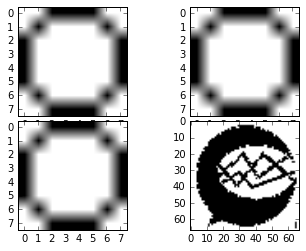

In [5]:
fig = plt.figure()
ax1 = plt.subplot2grid((8,6),(0,0), rowspan=4, colspan=3)
ax2 = plt.subplot2grid((8,6),(4,0), rowspan=4, colspan=3)
ax3 = plt.subplot2grid((8,6),(0,3), rowspan=4, colspan=3)
ax4 = plt.subplot2grid((8,6),(4,3), rowspan=4, colspan=3)
ax1.imshow(iar)
ax2.imshow(iar2)
ax3.imshow(iar3)
ax4.imshow(iar4)
plt.show()